In [32]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn import metrics
import random

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


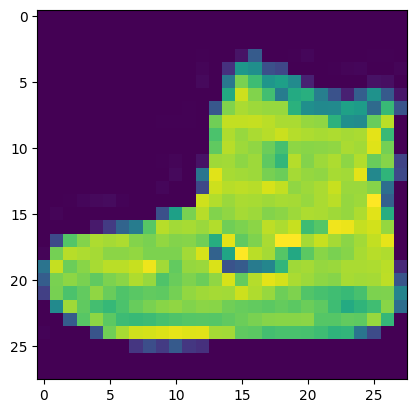

In [8]:
plt.imshow(train_img[0])

In [11]:
# Normalizing these pixel values to a range between 0 and 1
train_img = train_img / 255.0
test_img = test_img / 255.0

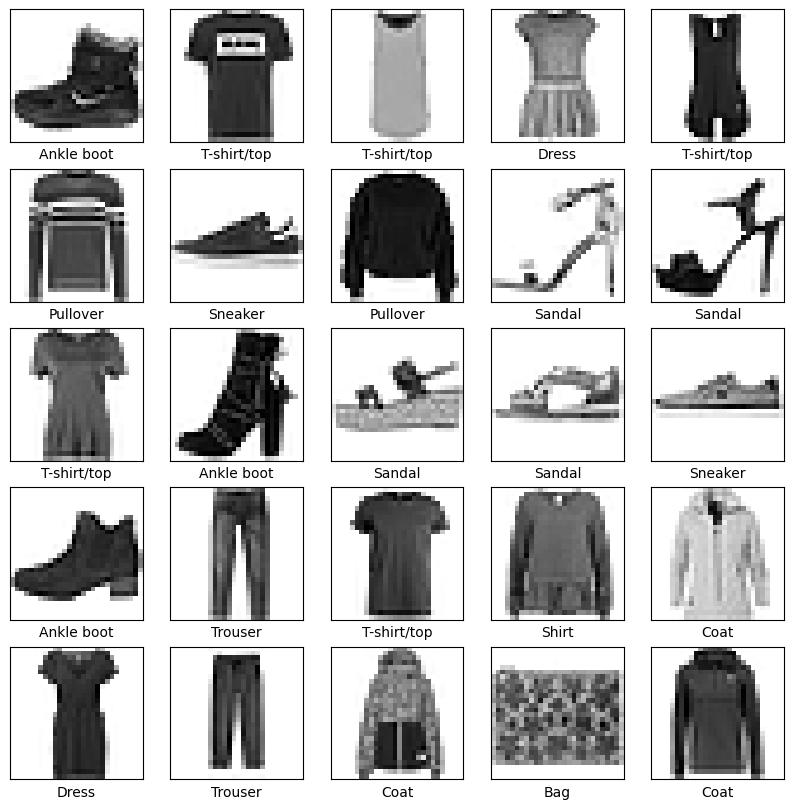

In [12]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #input layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [25]:
history = model.fit(train_img, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2321 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2212 - accuracy: 0.9169
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2146 - accuracy: 0.9190
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2096 - accuracy: 0.9209
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2022 - accuracy: 0.9245
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1958 - accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1913 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1854 - accuracy: 0.9302
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1801 - accuracy: 0.9322
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.177

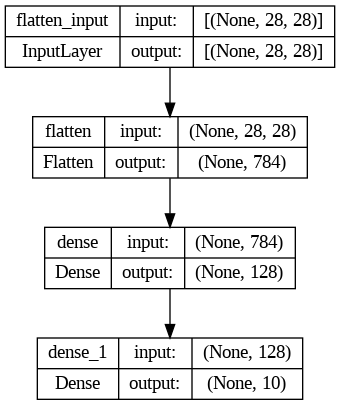

In [9]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print("\naccuracy of testing: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8814

accuracy of tessting:  0.8813999891281128


In [20]:
predictions = model.predict(test_img)

313/313 [==============================] - 1s 2ms/step


In [21]:
predictions[0]

array([1.5374901e-07, 3.4630130e-09, 1.5850129e-07, 1.1979432e-09,
       6.3478292e-06, 1.8021383e-04, 2.1392563e-07, 1.8098189e-03,
       4.0256353e-08, 9.9800307e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

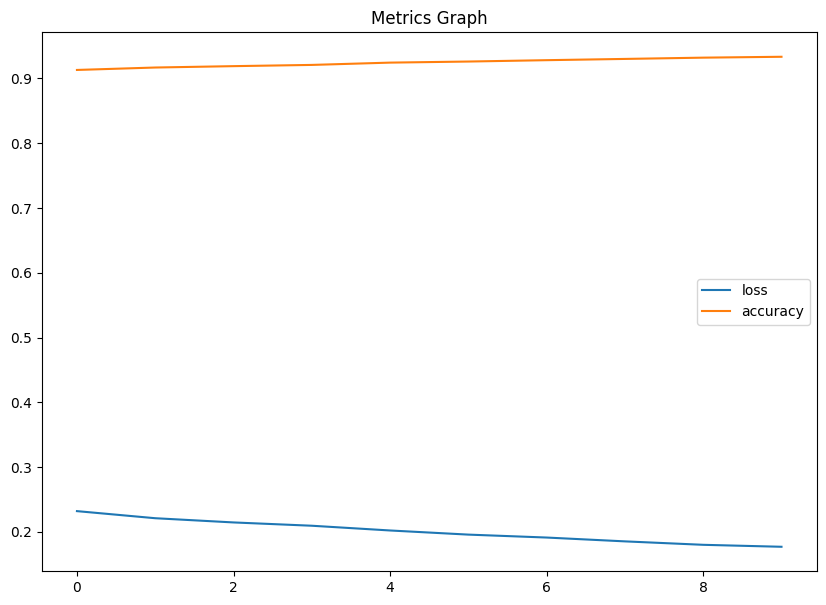

In [28]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()